In [1]:
import neural_lam.mesh.create
import matplotlib.pyplot as plt

In [2]:
import torch_geometric as pyg
import networkx 

In [3]:
import numpy as np
def _create_fake_xy(N=10):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    xy = np.meshgrid(x, y)
    xy = np.stack(xy, axis=0)
    return xy

In [12]:
def nx_draw_with_pos(g, with_labels=False, **kwargs):
    pos = {node: g.nodes[node]["pos"] for node in g.nodes()}
    ax = kwargs.pop("ax", None)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    networkx.draw_networkx(
        ax=ax, G=g, pos=pos, hide_ticks=False, with_labels=with_labels, **kwargs
    )
    
def nx_draw_with_pos_and_length(g, with_labels=False, node_size=300, node_color="grey", **kwargs):
    edge_lengths = [g.edges[edge]["len"] for edge in g.edges()]
    nx_draw_with_pos(
        g, edge_color=edge_lengths,
        node_size=node_size, arrows=True,
        with_labels=False, connectionstyle="arc3, rad=0.1", edge_cmap=plt.get_cmap("tab20"), node_color=node_color, **kwargs
    )

In [5]:
xy = _create_fake_xy()

In [17]:
G_grid = neural_lam.mesh.create.create_grid_graph_nodes(xy=xy)
G_mesh = neural_lam.mesh.create.create_single_level_2d_mesh_graph(xy=xy, nx=5, ny=5)
G_mesh.clear_edges()

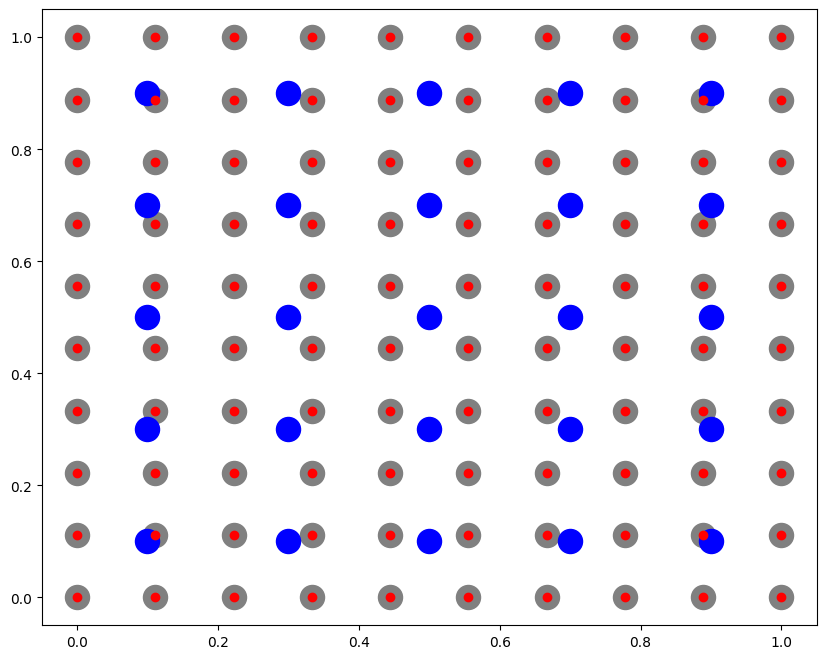

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
nx_draw_with_pos_and_length(G_grid, ax=ax)
nx_draw_with_pos_and_length(G_mesh, ax=ax, node_color="blue")
ax.scatter(xy[0], xy[1], color="red", zorder=10)

In [23]:
G_m2g = neural_lam.mesh.create.create_cross_level_graph(G_source=G_mesh, G_target=G_grid, method="nearest_neighbour", max_num_neighbours=10)

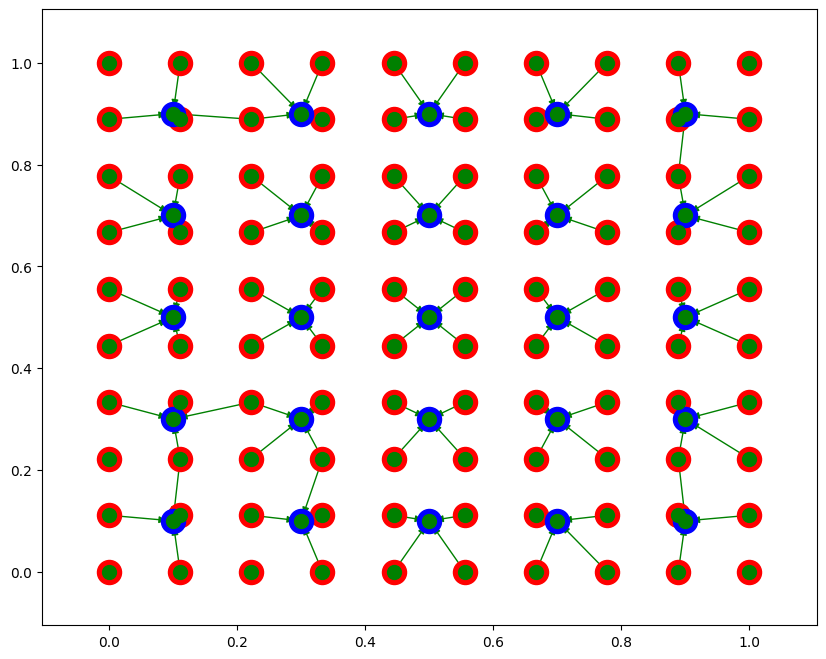

In [26]:
G_m2g = neural_lam.mesh.create.create_cross_level_graph(G_source=G_mesh, G_target=G_grid, method="nearest_neighbours", max_num_neighbours=4)
fig, ax = plt.subplots(figsize=(10, 8))
nx_draw_with_pos_and_length(G_grid, ax=ax, node_color="red")
nx_draw_with_pos_and_length(G_mesh, ax=ax, node_color="blue")
nx_draw_with_pos(G_m2g, ax=ax, node_color="green", node_size=100, edge_color="green")